In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
# Read data 
df = pd.read_csv('ign_cleaned.csv')
#dropping the unneeded values
df.drop(['Unnamed: 0', 'url'], axis=1, inplace=True)

df.columns.values

array(['score_phrase', 'title', 'platform', 'score', 'genre',
       'editors_choice', 'release_year', 'release_month', 'release_day'],
      dtype=object)

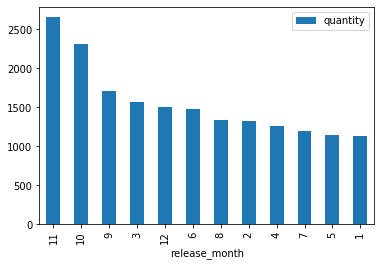

In [285]:
# 14. Check the genres with the highest masterpieces

In [288]:
# 6. Check the total hits and flops by top platforms
df['platform'].value_counts()#[:10].plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0,0,0,0,0,0])
# plt.title('Distribution of Top Genre')
# plt.show()

PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      